In [10]:
using StatsBase
using HypothesisTests
using JLD

using Plots; gr();

In [12]:
files = ["../data/commutativity-n2-r2007.jld", 
    "../data/commutativity-n10-r2007.jld", 
    "../data/commutativity-n100-r2007.jld"]

3-element Vector{String}:
 "../data/commutativity-n2-r2007.jld"
 "../data/commutativity-n10-r2007.jld"
 "../data/commutativity-n100-r2007.jld"

Any[]

In [48]:
plots = []

for (i, prop) in enumerate(["Rho", "Vp", "Vp/Vs"])
    d = load(files[1])
    diffs = (d["props_of_ave"][:,i,:] .- d["ave_properties"][:,i,:]) 
    p = plot(collect(Iterators.flatten(diffs)), normalize=:pdf, seriestype=:stephist, legend=false,
          yticks=false, framestyle=:box)
    
    flatdifs = [Iterators.flatten(diffs)...]
    flatdifs = flatdifs[.!isnan.(flatdifs)]
    
    println(pvalue(OneSampleTTest(flatdifs)))

    p = plot!(title=prop)

    if i != 1
        p = plot!(legend=false)
    end

    append!(plots, [p])
end


1.763741086852284e-7
3.4883149649329324e-55
2.6903308371275527e-81


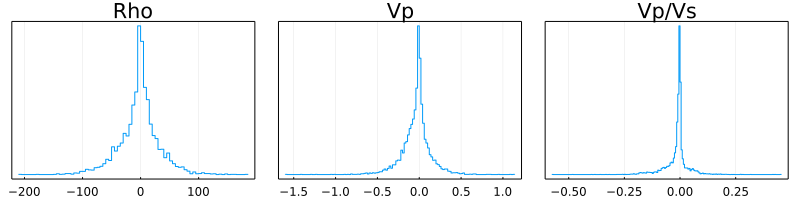

In [51]:
p = plot(plots..., layout=(1,3), size=(800, 200))
#savefig("../../thesis/figures/property_comm.png")

In [18]:
d = load(files[1])
    diffs = (d["props_of_ave"][:,1,:] .- d["ave_properties"][:,1,:]) 

3×2007 Matrix{Float64}:
  1.64274  44.2672  -48.9169  -46.7144  …    6.05044   1.12531      -9.97157
  1.4227   37.4111  -71.757   -57.5525      -5.25743   0.00892157  -21.6069
 -1.69092  23.6274   40.6335   -7.7981     -17.2511   -0.0357692    -6.9022

In [23]:
[Iterators.flatten(diffs)...]

6021-element Vector{Float64}:
   1.6427358490582264
   1.4227000000000771
  -1.690918367346967
  44.267222222221335
  37.41111111111104
  23.62738636363656
 -48.916862745099024
 -71.75696078431338
  40.63350000000082
 -46.71437500000002
 -57.55249999999978
  -7.798095238094902
 -35.19444444444434
   ⋮
  27.582450980391513
  11.942900000000463
  11.537941176471122
   6.050443037976038
  -5.2574285714295
 -17.25105263157866
   1.1253061224497287
   0.008921568627101806
  -0.035769230769346905
  -9.971568627450779
 -21.60686274509817
  -6.9021999999999935